In [ ]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

import matplotlib.pyplot as plt

import tensorflow as tf
tf.keras.utils.set_random_seed(100)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA

In [ ]:
train_df = pd.read_excel('train_final.xlsx')
test_df = pd.read_excel('test_final.xlsx')
X_train = train_df.drop(columns='label')
y_train = train_df['label'].replace({'Positive':1,'Negative':0}).values
X_test = test_df.drop(columns='label')
y_test = test_df['label'].replace({'Positive':1,'Negative':0}).values

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
test_df['label'].value_counts()

In [ ]:

model = Sequential([LSTM(16,input_shape=(169,1)),
                   Dense(1,activation='sigmoid')])

model.compile(loss='binary_crossentropy',optimizer='SGD',metrics='accuracy')
model.summary()

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_99 (LSTM)              (None, 16)                1152      
                                                                 
 dense_104 (Dense)           (None, 1)                 17        
                                                                 
Total params: 1169 (4.57 KB)
Trainable params: 1169 (4.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = model.fit(X_train, y_train, epochs=30, batch_size=32,validation_data=(X_test,y_test))

Epoch 1/30
26/26 [==============================] - 5s 47ms/step - loss: 0.6924 - accuracy: 0.4670 - val_loss: 0.6920 - val_accuracy: 0.4975
Epoch 2/30
26/26 [==============================] - 0s 16ms/step - loss: 0.6920 - accuracy: 0.4869 - val_loss: 0.6918 - val_accuracy: 0.5025
Epoch 3/30
26/26 [==============================] - 0s 12ms/step - loss: 0.6918 - accuracy: 0.5031 - val_loss: 0.6917 - val_accuracy: 0.4925
Epoch 4/30
26/26 [==============================] - 0s 11ms/step - loss: 0.6915 - accuracy: 0.4919 - val_loss: 0.6916 - val_accuracy: 0.4478
Epoch 5/30
26/26 [==============================] - 0s 12ms/step - loss: 0.6912 - accuracy: 0.4757 - val_loss: 0.6916 - val_accuracy: 0.4975
Epoch 6/30
26/26 [==============================] - 0s 12ms/step - loss: 0.6910 - accuracy: 0.4944 - val_loss: 0.6914 - val_accuracy: 0.4726
Epoch 7/30
26/26 [==============================] - 0s 11ms/step - loss: 0.6907 - accuracy: 0.4732 - val_loss: 0.6911 - val_accuracy: 0.4478
Epoch 8/30
26

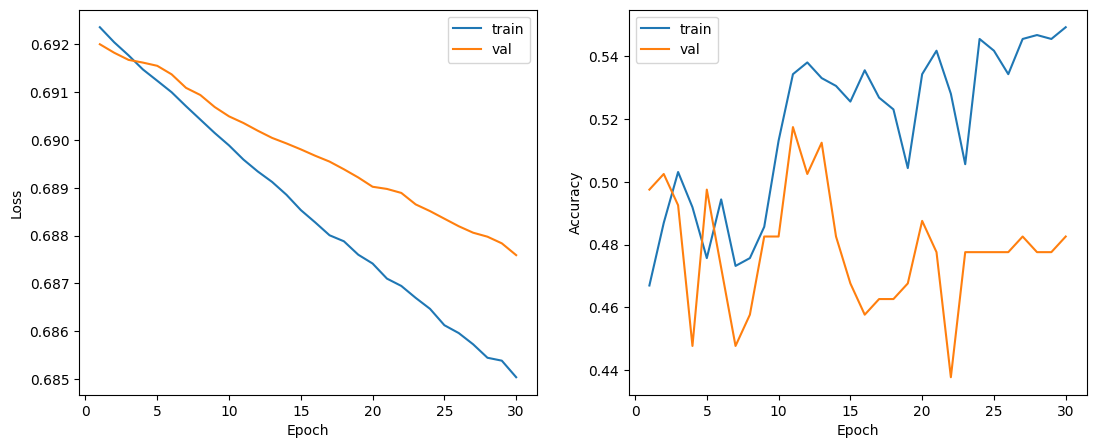

In [ ]:
import matplotlib.pyplot as plt

epochs = 30
fig, ax = plt.subplots(ncols=2,figsize=(13,5))
ax[0].plot(range(1,epochs+1),hist.history['loss'], label='train')
ax[0].plot(range(1,epochs+1),hist.history['val_loss'], label='val')
ax[1].plot(range(1,epochs+1),hist.history['accuracy'], label='train')
ax[1].plot(range(1,epochs+1),hist.history['val_accuracy'], label='val')

ax[0].set_xlabel('Epoch')
ax[1].set_xlabel('Epoch')

ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy')

ax[0].legend()
ax[1].legend()

In [ ]:
losses = [[],[]]
precs = [[],[]]
trying = ['SGD','Adam','Nadam','RMSProp','Adamax']
for x in trying:
  model = Sequential([LSTM(16,input_shape=(169,1)),Dense(1, activation='sigmoid')])
  model.compile(loss='binary_crossentropy',optimizer=x,metrics='accuracy')
  hist = model.fit(X_train, y_train, epochs=30, batch_size=32,validation_data=(X_test,y_test),verbose=0)
  keys = list(hist.history.keys())
  losses[0].append(hist.history[keys[0]][-1])
  losses[1].append(hist.history[keys[2]][-1])
  precs[0].append(hist.history[keys[1]][-1])
  precs[1].append(hist.history[keys[3]][-1])

eval = pd.DataFrame({'Optimizer':trying,'loss':losses[0],'val loss':losses[1],'accuracy':precs[0],'val accuracy':precs[1]})
eval

,Optimizer,loss,val loss,accuracy,val accuracy
0,SGD,0.687278,0.689456,0.597758,0.552239
1,Adam,0.612918,0.611687,0.661270,0.656716
2,Nadam,0.618632,0.614307,0.635118,0.666667
3,RMSProp,0.615658,0.625594,0.651308,0.636816
4,Adamax,0.643994,0.641303,0.653798,0.671642


In [ ]:
losses = [[],[]]
precs = [[],[]]
trying = (2,4,8,16,32,64,128)
for x in trying:
  model = Sequential([LSTM(x,input_shape=(169,1)),Dense(1, activation='sigmoid')])
  model.compile(loss='binary_crossentropy',optimizer='Adam',metrics='accuracy')
  hist = model.fit(X_train, y_train, epochs=30, batch_size=32,validation_data=(X_test,y_test),verbose=0)
  keys = list(hist.history.keys())
  losses[0].append(hist.history[keys[0]][-1])
  losses[1].append(hist.history[keys[2]][-1])
  precs[0].append(hist.history[keys[1]][-1])
  precs[1].append(hist.history[keys[3]][-1])

eval = pd.DataFrame({'LSTM Hidden Unit':trying,'loss':losses[0],'val loss':losses[1],'accuracy':precs[0],'val accuracy':precs[1]})
eval

,LSTM Hidden Unit,loss,val loss,accuracy,val accuracy
0,2,0.673632,0.685104,0.575342,0.532338
1,4,0.647804,0.632886,0.623910,0.661692
2,8,0.626679,0.630304,0.647572,0.656716
3,16,0.613934,0.602811,0.643836,0.666667
4,32,0.600899,0.610440,0.661270,0.666667
5,64,0.602633,0.607657,0.647572,0.676617
6,128,0.596558,0.629369,0.631382,0.636816


In [ ]:
losses = [[],[]]
precs = [[],[]]
trying = (0.00001, 0.0001, 0.001, 0.01)
for x in trying:
  model = Sequential([LSTM(32,input_shape=(169,1)),Dense(1, activation='sigmoid')])
  model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=x),metrics='accuracy')
  hist = model.fit(X_train, y_train, epochs=30, batch_size=32,validation_data=(X_test,y_test),verbose=0)
  keys = list(hist.history.keys())
  losses[0].append(hist.history[keys[0]][-1])
  losses[1].append(hist.history[keys[2]][-1])
  precs[0].append(hist.history[keys[1]][-1])
  precs[1].append(hist.history[keys[3]][-1])

eval = pd.DataFrame({'Learning Rate':trying,'loss':losses[0],'val loss':losses[1],'accuracy':precs[0],'val accuracy':precs[1]})
eval

,Learning Rate,loss,val loss,accuracy,val accuracy
0,0.00001,0.689267,0.689578,0.574097,0.562189
1,0.00010,0.656093,0.659538,0.630137,0.631841
2,0.00100,0.598384,0.609762,0.674969,0.671642
3,0.01000,0.565444,0.622940,0.677460,0.691542


In [ ]:
losses = [[],[]]
precs = [[],[]]
trying = (0.00001, 0.0001, 0.001, 0.01, 0.1, 1)
for x in trying:
  model = Sequential([LSTM(32,input_shape=(169,1)),Dense(1, activation='sigmoid')])
  model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=x),metrics='accuracy')
  hist = model.fit(X_train, y_train, epochs=30, batch_size=32,validation_data=(X_test,y_test),verbose=0)
  keys = list(hist.history.keys())
  losses[0].append(hist.history[keys[0]][-1])
  losses[1].append(hist.history[keys[2]][-1])
  precs[0].append(hist.history[keys[1]][-1])
  precs[1].append(hist.history[keys[3]][-1])

eval = pd.DataFrame({'Clipnorm Value':trying,'loss':losses[0],'val loss':losses[1],'accuracy':precs[0],'val accuracy':precs[1]})
eval

,Clipnorm Value,loss,val loss,accuracy,val accuracy
0,0.00001,0.616222,0.600643,0.640100,0.671642
1,0.00010,0.612940,0.603788,0.640100,0.686567
2,0.00100,0.607725,0.608614,0.667497,0.681592
3,0.01000,0.628165,0.617026,0.651308,0.651741
4,0.10000,0.605607,0.617121,0.653798,0.656716
5,1.00000,0.599657,0.610878,0.671233,0.681592


In [ ]:
model = Sequential([LSTM(32,input_shape=(169,1)),
                   Dense(1,activation='sigmoid')])

model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1),metrics='accuracy')
hist = model.fit(X_train, y_train, epochs=60, batch_size=32,validation_data=(X_test,y_test))

Epoch 1/60
26/26 [==============================] - 3s 31ms/step - loss: 0.6894 - accuracy: 0.5616 - val_loss: 0.6848 - val_accuracy: 0.6020
Epoch 2/60
26/26 [==============================] - 0s 10ms/step - loss: 0.6819 - accuracy: 0.5928 - val_loss: 0.6781 - val_accuracy: 0.6318
Epoch 3/60
26/26 [==============================] - 0s 10ms/step - loss: 0.6737 - accuracy: 0.6252 - val_loss: 0.6678 - val_accuracy: 0.6169
Epoch 4/60
26/26 [==============================] - 0s 10ms/step - loss: 0.6647 - accuracy: 0.6264 - val_loss: 0.6614 - val_accuracy: 0.6318
Epoch 5/60
26/26 [==============================] - 0s 12ms/step - loss: 0.6587 - accuracy: 0.6451 - val_loss: 0.6538 - val_accuracy: 0.5970
Epoch 6/60
26/26 [==============================] - 0s 11ms/step - loss: 0.6524 - accuracy: 0.6326 - val_loss: 0.6470 - val_accuracy: 0.6219
Epoch 7/60
26/26 [==============================] - 0s 13ms/step - loss: 0.6483 - accuracy: 0.6239 - val_loss: 0.6409 - val_accuracy: 0.6219
Epoch 8/60
26

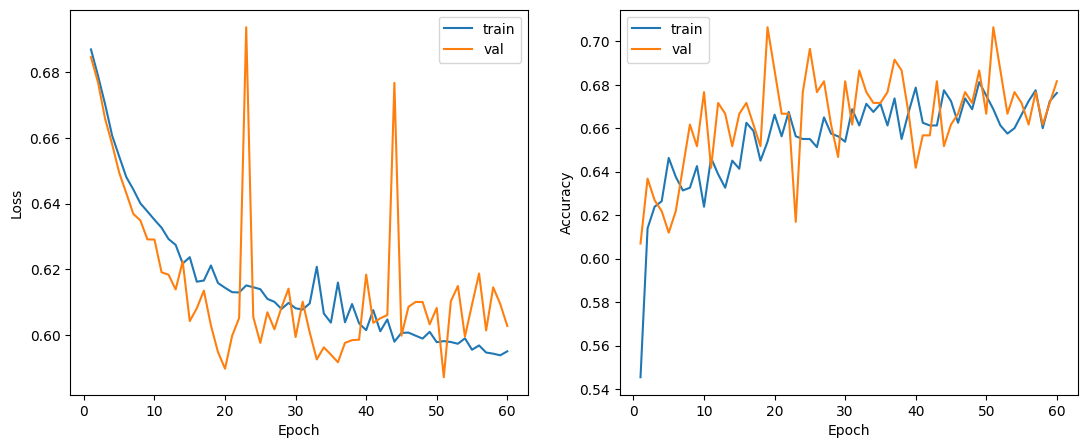

In [ ]:
epochs = 60
fig, ax = plt.subplots(ncols=2,figsize=(13,5))
ax[0].plot(range(1,epochs+1),hist.history['loss'], label='train')
ax[0].plot(range(1,epochs+1),hist.history['val_loss'], label='val')
ax[1].plot(range(1,epochs+1),hist.history['accuracy'], label='train')
ax[1].plot(range(1,epochs+1),hist.history['val_accuracy'], label='val')

ax[0].set_xlabel('Epoch')
ax[1].set_xlabel('Epoch')

ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy')

ax[0].legend()
ax[1].legend()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = np.round(model.predict(X_train).reshape(-1))
print(classification_report(y_train,y_pred))

26/26 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       401
           1       0.66      0.76      0.71       402

    accuracy                           0.68       803
   macro avg       0.69      0.68      0.68       803
weighted avg       0.69      0.68      0.68       803



In [ ]:
confusion_matrix(y_train,y_pred,labels=[1,0])

array([[307,  95],
       [158, 243]])

In [ ]:
y_pred = np.round(model.predict(X_test).reshape(-1))
print(classification_report(y_test,y_pred))

7/7 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       101
           1       0.66      0.66      0.66       100

    accuracy                           0.66       201
   macro avg       0.66      0.66      0.66       201
weighted avg       0.66      0.66      0.66       201



In [ ]:
confusion_matrix(y_test,y_pred,labels=[1,0])

array([[66, 34],
       [34, 67]])

In [ ]:
model = Sequential([LSTM(32,input_shape=(169,1)),
                   Dense(1,activation='sigmoid')])

model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1),metrics='accuracy')
hist = model.fit(X_train, y_train, epochs=40, batch_size=32,validation_data=(X_test,y_test))

Epoch 1/40
26/26 [==============================] - 3s 41ms/step - loss: 0.6843 - accuracy: 0.6090 - val_loss: 0.6804 - val_accuracy: 0.6070
Epoch 2/40
26/26 [==============================] - 0s 14ms/step - loss: 0.6751 - accuracy: 0.6177 - val_loss: 0.6699 - val_accuracy: 0.6169
Epoch 3/40
26/26 [==============================] - 0s 15ms/step - loss: 0.6639 - accuracy: 0.6339 - val_loss: 0.6567 - val_accuracy: 0.6418
Epoch 4/40
26/26 [==============================] - 0s 13ms/step - loss: 0.6539 - accuracy: 0.6351 - val_loss: 0.6464 - val_accuracy: 0.6169
Epoch 5/40
26/26 [==============================] - 0s 15ms/step - loss: 0.6451 - accuracy: 0.6326 - val_loss: 0.6460 - val_accuracy: 0.6070
Epoch 6/40
26/26 [==============================] - 0s 15ms/step - loss: 0.6434 - accuracy: 0.6227 - val_loss: 0.6401 - val_accuracy: 0.6219
Epoch 7/40
26/26 [==============================] - 0s 12ms/step - loss: 0.6395 - accuracy: 0.6264 - val_loss: 0.6347 - val_accuracy: 0.6468
Epoch 8/40
26

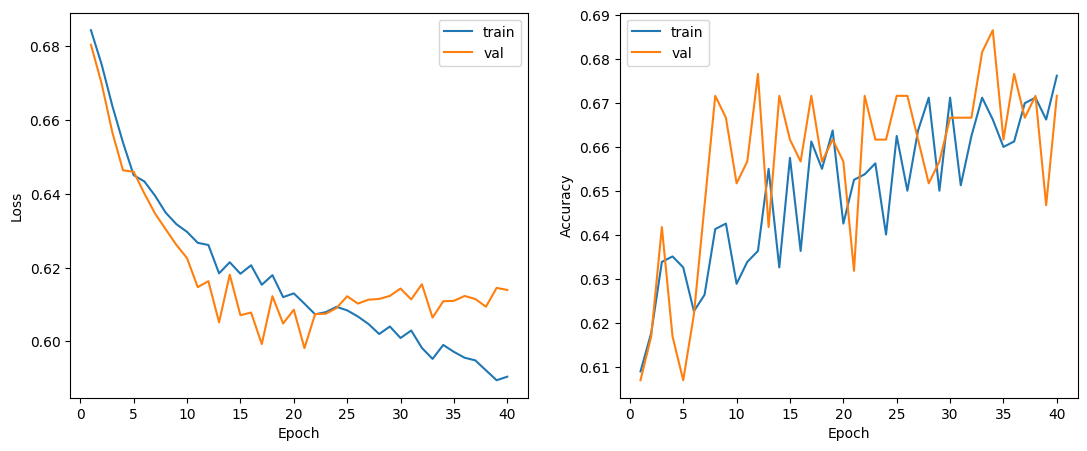

In [ ]:
epochs = 40
fig, ax = plt.subplots(ncols=2,figsize=(13,5))
ax[0].plot(range(1,epochs+1),hist.history['loss'], label='train')
ax[0].plot(range(1,epochs+1),hist.history['val_loss'], label='val')
ax[1].plot(range(1,epochs+1),hist.history['accuracy'], label='train')
ax[1].plot(range(1,epochs+1),hist.history['val_accuracy'], label='val')

ax[0].set_xlabel('Epoch')
ax[1].set_xlabel('Epoch')

ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy')

ax[0].legend()
ax[1].legend()

In [ ]:
y_pred = np.round(model.predict(X_train).reshape(-1))
print(classification_report(y_train,y_pred))

26/26 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       401
           1       0.66      0.74      0.70       402

    accuracy                           0.68       803
   macro avg       0.68      0.68      0.67       803
weighted avg       0.68      0.68      0.67       803



In [ ]:
confusion_matrix(y_train,y_pred,labels=[1,0])

array([[297, 105],
       [155, 246]])

In [ ]:
y_pred = np.round(model.predict(X_test).reshape(-1))
print(classification_report(y_test,y_pred))

7/7 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.69      0.62      0.66       101
           1       0.65      0.72      0.69       100

    accuracy                           0.67       201
   macro avg       0.67      0.67      0.67       201
weighted avg       0.67      0.67      0.67       201



In [ ]:
confusion_matrix(y_test,y_pred,labels=[1,0])

array([[72, 28],
       [38, 63]])